# ANALISIS EXPLORATORIO DE LOS DATOS (EDA) Y MODELADO DE DATOS

## ANALISIS EXPLORATORIO (EDA)
## El objetivo es entender la estructura , las caracteristicas y las posibles relaciones en los datos antes de construir cualquier modelo.

## Carga librerias y machine learning
### *Pandas(pd): Manejo y análisis de estructuras de datos.
### *NumPy(np): Soporte para arrays y matrices de alto rendimiento.
### *Matplotlib.pyplot(plt): Creación de gráficos y visualizaciones estáticas.
### *Scikit-learn (SKlearn): Las herramientas de Scikit-learn cumplen el siguiente ciclo de vida del modelo:
    train_test_split: Preparación de Datos.
    LinearRegression: Modelado (El Estimador)
    Métricas (r2_score, mean_absolute_error, etc.): Evaluación del Modelo
### *Seaborn

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, explained_variance_score

### Visión general de los datos

* `df.head()`: Primeras filas, para ver las columnas, los nombres y los tipos de datos a grandes rasgos.
* `df.info()`: Revisar la información con un resumen de números de filas y columnas, los nombres de las columnas, la cantidad de valores no nulos en cada una y el tipo de dato.
* `df.describe()`: Obtener estadísticas descriptivas para las columnas numéricas. Con esto nos mostrará estadísticas como la media, desviación estándar, valores mínimos y máximos, y los cuartiles.

In [5]:
# Carga el archivo del archivo limpio
df = pd.read_csv('G:\\tecnicatura en cd e ia\\2025\\SEGUNDO AÑO\\2do año 1er cuatrimestre\\aprendizaje automatico\\PROYECTOS AA\\actividades de ML\\data\\processed\\pib_limpio.csv', skiprows=1)
df.columns = df.columns.str.replace(r'\.0$', '', regex=True)
# Opcional: Convierte los nombres de columna de string a entero si solo contienen el año.
# Los nombres de columna Country Name y Country Code se ignorarán automáticamente aquí
new_cols = []
for col in df.columns:
    try:
        new_cols.append(int(col))
    except ValueError:
        new_cols.append(col)
df.columns = new_cols

print(df.head())
print(df.columns)

    Country Name Country Code          2019          2020          2021  \
0      Argentina          ARG  1.492100e+12  5.090000e+11  2.781000e+11   
1         Brazil          BRA  8.961000e+11  2.279500e+12  1.978400e+12   
2  United States          USA  2.164700e+12  6.277000e+11  6.323000e+11   
3          China          CHN  8.600000e+09  1.491000e+11  1.204200e+12   
4          India          IND  8.261000e+11  1.537000e+12  2.098200e+12   

           2022          2023  
0  7.350000e+11  1.361300e+12  
1  1.322700e+12  1.234500e+12  
2  1.705900e+12  1.531200e+12  
3  2.200000e+12  9.592000e+11  
4  2.001300e+12  1.486400e+12  
Index(['Country Name', 'Country Code', 2019, 2020, 2021, 2022, 2023], dtype='object')


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country Name  51 non-null     object 
 1   Country Code  51 non-null     object 
 2   2019          51 non-null     float64
 3   2020          51 non-null     float64
 4   2021          51 non-null     float64
 5   2022          51 non-null     float64
 6   2023          51 non-null     float64
dtypes: float64(5), object(2)
memory usage: 2.9+ KB


In [7]:
# --- Estadísticas Descriptivas ---
print("--- Estadísticas Descriptivas del PIB por año ---")
# Seleccionamos las columnas de los años para el análisis
df_pib = df[[2019, 2020, 2021, 2022, 2023]]
print(df_pib.describe())
print("\n")

--- Estadísticas Descriptivas del PIB por año ---
               2019          2020          2021          2022          2023
count  5.100000e+01  5.100000e+01  5.100000e+01  5.100000e+01  5.100000e+01
mean   2.297086e+12  2.530067e+12  2.420443e+12  2.506341e+12  2.724741e+12
std    8.074134e+12  8.891849e+12  8.499300e+12  8.794686e+12  9.552498e+12
min    8.600000e+09  1.150000e+10  2.860000e+10  4.290000e+10  2.170000e+10
25%    4.702000e+11  5.225500e+11  6.608000e+11  7.343000e+11  1.185300e+12
50%    1.230300e+12  1.399400e+12  1.356700e+12  1.330500e+12  1.479800e+12
75%    1.904900e+12  2.160050e+12  1.846400e+12  1.856800e+12  1.807000e+12
max    5.857570e+13  6.451670e+13  6.172130e+13  6.391170e+13  6.948090e+13




# VISUALIZACIONES

## Antes de visualizar:

## Paso 1: Identificar y Extraer el PIB Mundial

* Localizar la fila que representa al Mundo usando la columna Country Code y guardarla en una nueva variable. Usar el código es más seguro que usar el nombre, ya que el código (WLD) es único.

In [8]:
# 1. Identificar la fila que contiene el PIB Mundial
pib_mundial_series = df[df['Country Code'] == 'WLD']

# 2. (Opcional) Se puede verificar la fila extraída
print("PIB Mundial (Fila Y extraída):")
print(pib_mundial_series)

PIB Mundial (Fila Y extraída):
   Country Name Country Code          2019          2020          2021  \
50        World          WLD  5.857570e+13  6.451670e+13  6.172130e+13   

            2022          2023  
50  6.391170e+13  6.948090e+13  


## Paso 2: Eliminar la Fila del Mundo (Limpieza)

### Ahora que están los datos del PIB Mundial guardados, hay que eliminar esa fila del DataFrame principal (df) para que no interfiera con los predictores.

In [9]:
# Elimina la fila del mundo del DataFrame df
df = df[df['Country Code'] != 'WLD']

# 3. Verificar que la fila fue eliminada y solo quedan países
print("\nPrimeras filas del DataFrame (sin el Mundo):")
print(df.head())


Primeras filas del DataFrame (sin el Mundo):
    Country Name Country Code          2019          2020          2021  \
0      Argentina          ARG  1.492100e+12  5.090000e+11  2.781000e+11   
1         Brazil          BRA  8.961000e+11  2.279500e+12  1.978400e+12   
2  United States          USA  2.164700e+12  6.277000e+11  6.323000e+11   
3          China          CHN  8.600000e+09  1.491000e+11  1.204200e+12   
4          India          IND  8.261000e+11  1.537000e+12  2.098200e+12   

           2022          2023  
0  7.350000e+11  1.361300e+12  
1  1.322700e+12  1.234500e+12  
2  1.705900e+12  1.531200e+12  
3  2.200000e+12  9.592000e+11  
4  2.001300e+12  1.486400e+12  


# Reestructurar (Transponer) los datos

## Debemos transponer ambos DataFrames (df y pib_mundial_series) para que los años se conviertan en el índice (filas).

## 1. Preparar los países predictores (X)

Transpondremos el DataFrame principal (df) para que cada país se convierta en una columna.

In [38]:
# Asegúrate de que los nombres de columna son las claves correctas (int o str)
años_claves = [2019, 2020, 2021, 2022, 2023] # O usa ['2019', '2020', etc.] si son strings

# Selecciona el PIB de los 3 países que quieres probar
paises_a_probar = ['United States', 'China', 'Germany'] # Asegúrate de que estos nombres son exactos

# Prepara los datos X (debe ser una matriz de 5 filas x N países)
X_pib = df[df['Country Name'].isin(paises_a_probar)][años_claves].T

# Renombrar las columnas de X (opcional, pero ayuda)
X_pib.columns = df[df['Country Name'].isin(paises_a_probar)]['Country Name'].values

## 2. Preparar el PIB Mundial (Y)

Extraer solo los datos de los años y transponerlos, manteniendo el año como índice.

In [39]:
Y_pib = df_modelo['PIB_Mundial']
# Y_pib es una Serie de 5 valores: (58.5T, 64.5T, 61.7T, 63.9T, 69.4T)

## Combinar los Datos (X y Y)

### Ahora combinaremos los dos DataFrames en uno solo basado en la columna Año.

## Gráficos de Dispersión Iniciales

Antes de hacer la regresión múltiple, es útil ver la relación lineal entre algunos países importantes y el PIB Mundial. Esto ayudará a seleccionar las mejores combinaciones.

Vamos a graficar el PIB de China y Estados Unidos (EE. UU.) contra el PIB Mundial.

In [42]:
# 1. Encuentar la fila del país
eeuu_pib = df[df['Country Name'] == 'United States']
china_pib = df[df['Country Name'] == 'China']

# 2. Seleccionar solo las columnas de años y transponer (X_eeuu y X_china)
años_int = [a for a in range(2019, 2024)]

eeuu_x = eeuu_pib[años_int].T.reset_index().rename(columns={'index': 'Año', eeuu_pib.index[0]: 'United States'})
china_x = china_pib[años_int].T.reset_index().rename(columns={'index': 'Año', china_pib.index[0]: 'China'})

# 3. Fusionar solo las columnas necesarias (EE. UU., China y PIB Mundial)
df_modelo_nuevo = pd.merge(eeuu_x, china_x, on='Año')

# Finalmente, fusiona con el PIB Mundial (que ya estaba bien: pib_mundial_y)
df_modelo_final = pd.merge(df_modelo_nuevo, pib_mundial_y, on='Año')


## Gráfico de regresion lineal simple

### Comparo el PIB mundial con el PIB dos paises (USA y CHINA)

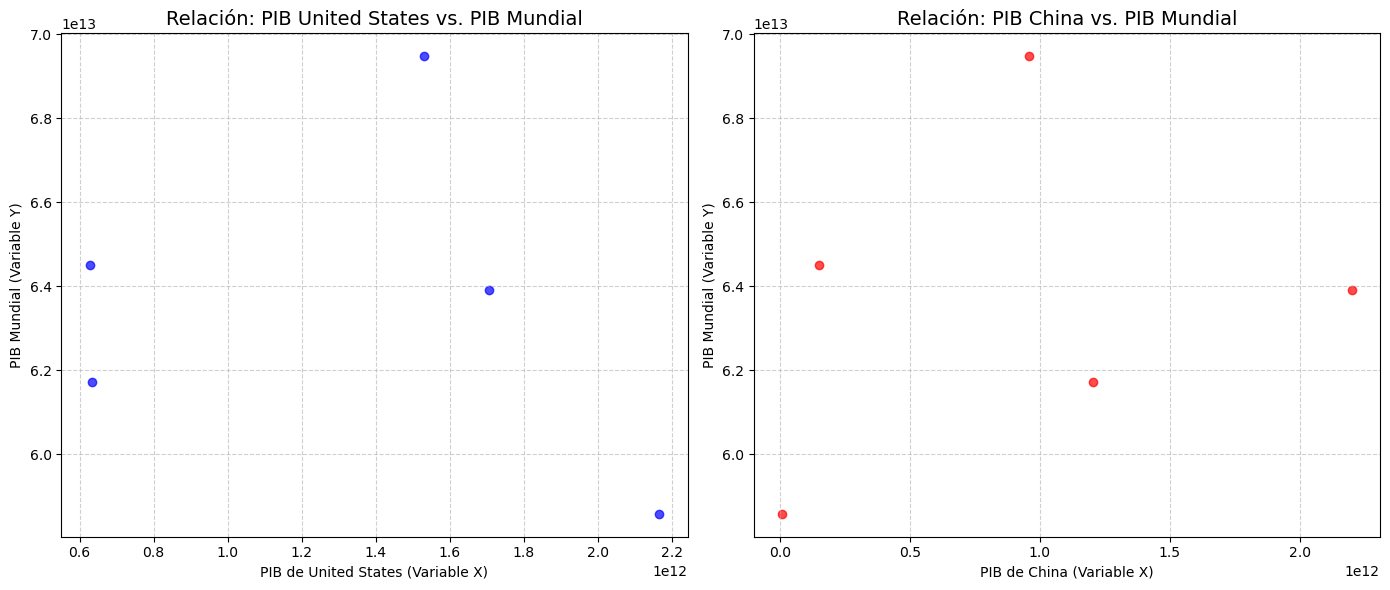

In [41]:
# Selecciona los países que quieres probar.
pais_1 = 'United States'
pais_2 = 'China' 

plt.figure(figsize=(14, 6))

# --- Gráfico 1: PIB de EE. UU. vs. PIB Mundial ---
plt.subplot(1, 2, 1) # 1 fila, 2 columnas, posición 1
plt.scatter(df_modelo[pais_1], df_modelo['PIB_Mundial'], color='blue', alpha=0.7)
plt.title(f'Relación: PIB {pais_1} vs. PIB Mundial', fontsize=14)
plt.xlabel(f'PIB de {pais_1} (Variable X)')
plt.ylabel('PIB Mundial (Variable Y)')
plt.grid(True, linestyle='--', alpha=0.6)

# --- Gráfico 2: PIB de China vs. PIB Mundial ---
plt.subplot(1, 2, 2) # 1 fila, 2 columnas, posición 2
plt.scatter(df_modelo[pais_2], df_modelo['PIB_Mundial'], color='red', alpha=0.7)
plt.title(f'Relación: PIB {pais_2} vs. PIB Mundial', fontsize=14)
plt.xlabel(f'PIB de {pais_2} (Variable X)')
plt.ylabel('PIB Mundial (Variable Y)')
plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout() # Ajustar el espaciado para que no se superpongan los títulos
plt.show()

La dispersión puede ser una señal de que la relación lineal simple (un solo país) es débil, lo cual fortalece el objetivo de encontrar la mejor combinación a través de la regresión lineal múltiple.

## Modelado de Regresión Multiple

### El objetivo ahora es encontrar qué combinación de países produce el R2 más alto.

## Paso 1: Preparación de variables

In [43]:
# 1. Variable Dependiente (Y): PIB Mundial
Y = df_modelo['PIB_Mundial']

# 2. Variables Independientes (X): PIB de TODOS los países
# Excluimos 'Año' y 'PIB_Mundial'
X_candidatos = df_modelo.drop(columns=['Año', 'PIB_Mundial']) 

# Opcional pero recomendado: eliminar cualquier columna con valores NaN 
# que hayan quedado del proceso de 'coerce'.
X_candidatos = X_candidatos.dropna(axis=1) 

print("Países candidatos (columnas X):")
print(X_candidatos.columns.tolist())

Países candidatos (columnas X):
['Argentina', 'Brazil', 'United States', 'China', 'India', 'Germany', 'France', 'United Kingdom', 'Italy', 'Spain', 'Canada', 'Mexico', 'Japan', 'South Korea', 'Australia', 'Russia', 'South Africa', 'Egypt', 'Nigeria', 'Kenya', 'Chile', 'Colombia', 'Peru', 'Venezuela', 'Ecuador', 'Bolivia', 'Paraguay', 'Uruguay', 'Saudi Arabia', 'United Arab Emirates', 'Turkey', 'Iran', 'Pakistan', 'Bangladesh', 'Indonesia', 'Thailand', 'Vietnam', 'Philippines', 'Malaysia', 'Singapore', 'Sweden', 'Norway', 'Denmark', 'Finland', 'Poland', 'Czech Republic', 'Hungary', 'Greece', 'Portugal', 'Netherlands']


## Paso 2: Pruebas de regresión múltiple iterativas

Realizamos pruebas con diferentes combinaciones, comenzando con las potencias económicas que tienen la mayor capacidad para influir en el PIB global.

### Modelo 1: Las Dos Potencias Más Grandes (EE. UU. + China)

In [45]:
# 1. Definir X e Y (usando todos los 5 puntos)
X_1 = X_candidatos[['United States', 'China']]
Y = df_modelo['PIB_Mundial']

# 2. Entrenar el modelo con TODOS los datos (X e Y)
modelo_1 = LinearRegression()
modelo_1.fit(X_1, Y) # Entrenamos con todas las 5 filas

# 3. Predecir y evaluar con el mismo conjunto de datos
Y_pred_1 = modelo_1.predict(X_1) # Predecimos usando las mismas 5 filas
r2_1 = r2_score(Y, Y_pred_1) # Comparamos Y real con Y predicha

# ¡Esto funcionará y te dará un R2 válido para comparar!
print(f"Resultado - Modelo 1 (EE. UU. + China): R2 = {r2_1:.4f}")

Resultado - Modelo 1 (EE. UU. + China): R2 = 0.1230


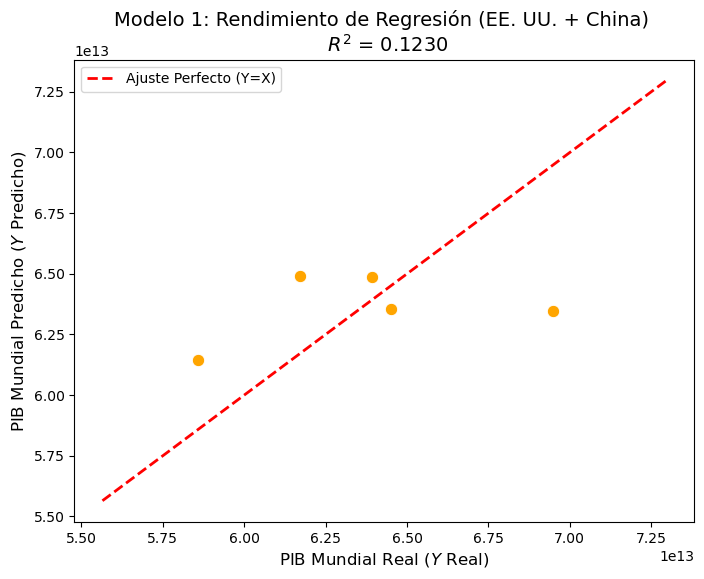

In [51]:
import seaborn as sns
# Variables necesarias
Y = df_modelo['PIB_Mundial']
r2_1 = 0.1230  # Usando tu resultado
# Y_pred_1 debe ser la predicción obtenida de modelo_1.predict(X_1)

# Determinar límites para el gráfico
max_val = max(Y.max(), Y_pred_1.max()) * 1.05
min_val = min(Y.min(), Y_pred_1.min()) * 0.95

plt.figure(figsize=(8, 6))
sns.scatterplot(x=Y, y=Y_pred_1, color='orange', s=80)

# Línea de referencia (Y = X)
plt.plot([min_val, max_val], [min_val, max_val], 
         color='red', linestyle='--', linewidth=2, label='Ajuste Perfecto (Y=X)')

plt.title(f'Modelo 1: Rendimiento de Regresión (EE. UU. + China) \n $R^2$ = {r2_1:.4f}', fontsize=14)
plt.xlabel('PIB Mundial Real ($Y$ Real)', fontsize=12)
plt.ylabel('PIB Mundial Predicho ($Y$ Predicho)', fontsize=12)
plt.legend()
plt.show()

## Modelo 2: Bloque G7 (7 Economías Avanzadas)

Para esta prueba, se incluirán más países que, juntos, explican una gran parte del PIB global.

In [47]:
# Países del G7 presentes en los datos
g7_paises = ['United States', 'China', 'Germany', 'France', 'United Kingdom', 'Italy', 'Japan'] 

# Limpiar la lista para solo incluir los países que existen en tus X_candidatos
# (Esto evita un KeyError si algún nombre no está en el DataFrame)
g7_final = [p for p in g7_paises if p in X_candidatos.columns]

# 1. Definir X para el Modelo 2 (usando todos los 5 puntos)
X_2 = X_candidatos[g7_final]
Y = df_modelo['PIB_Mundial']

# 2. Entrenar el modelo
modelo_2 = LinearRegression()
modelo_2.fit(X_2, Y)

# 3. Predecir y evaluar con el mismo conjunto de datos
Y_pred_2 = modelo_2.predict(X_2)
r2_2 = r2_score(Y, Y_pred_2)

print(f"Resultado - Modelo 2 (Bloque G7 - {len(g7_final)} países): R2 = {r2_2:.4f}")

Resultado - Modelo 2 (Bloque G7 - 7 países): R2 = 1.0000


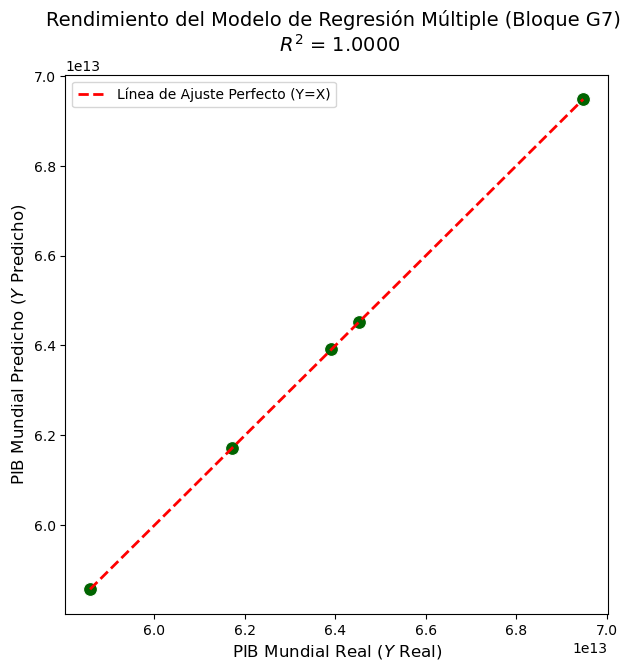

In [49]:
import seaborn as sns

# 1. Recuperar los datos del Modelo 2 (usaremos el PIB Mundial real y la predicción)
# Y ya es el PIB Mundial real (las 5 observaciones)
# Y_pred_2 es la predicción del Modelo 2

# 2. Crear el gráfico de dispersión
plt.figure(figsize=(7, 7))
sns.scatterplot(x=Y, y=Y_pred_2, color='darkgreen', s=100)

# 3. Dibujar la línea de referencia (Y = X)
# Esta línea representa un ajuste perfecto (donde el valor real es igual al valor predicho)
max_val = max(Y.max(), Y_pred_2.max())
min_val = min(Y.min(), Y_pred_2.min())
plt.plot([min_val, max_val], [min_val, max_val], 
         color='red', linestyle='--', linewidth=2, label='Línea de Ajuste Perfecto (Y=X)')

plt.title(f'Rendimiento del Modelo de Regresión Múltiple (Bloque G7) \n $R^2$ = {r2_2:.4f}', fontsize=14)
plt.xlabel('PIB Mundial Real ($Y$ Real)', fontsize=12)
plt.ylabel('PIB Mundial Predicho ($Y$ Predicho)', fontsize=12)
plt.legend()
plt.show()

## Modelo 3: Todos los países disponibles

Este modelo dará la máxima explicación posible que se puede lograr con este conjunto de datos.

In [48]:
# 1. Definir X para el Modelo 3: Todos los candidatos limpios (usando todos los 5 puntos)
X_3 = X_candidatos 
Y = df_modelo['PIB_Mundial']

# 2. Entrenar el modelo
modelo_3 = LinearRegression()
modelo_3.fit(X_3, Y)

# 3. Predecir y evaluar con el mismo conjunto de datos
Y_pred_3 = modelo_3.predict(X_3)
r2_3 = r2_score(Y, Y_pred_3)

print(f"Resultado - Modelo 3 (TODOS los Países - {X_3.shape[1]} países): R2 = {r2_3:.4f}")

Resultado - Modelo 3 (TODOS los Países - 50 países): R2 = 1.0000


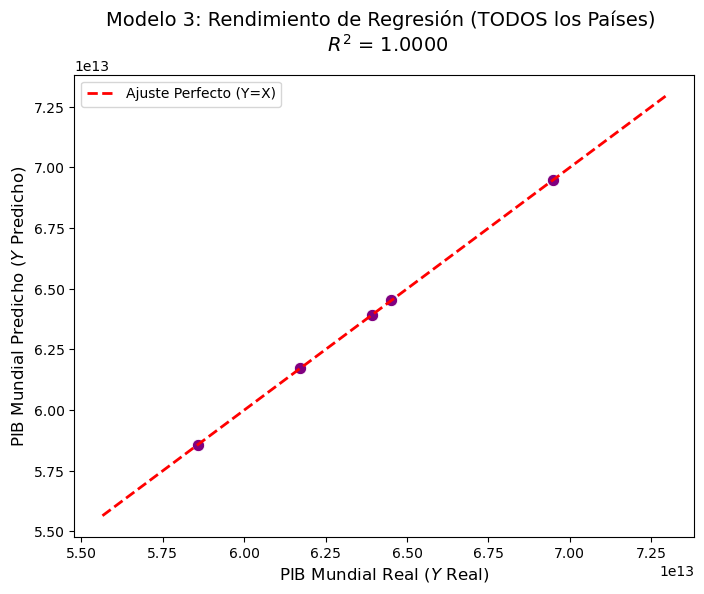

In [53]:
# Variables necesarias
Y = df_modelo['PIB_Mundial']
r2_3 = 1.0000  # Usando tu resultado
# Y_pred_3 debe ser la predicción obtenida de modelo_3.predict(X_3)

# Determinar límites para el gráfico
max_val = max(Y.max(), Y_pred_3.max()) * 1.05
min_val = min(Y.min(), Y_pred_3.min()) * 0.95

plt.figure(figsize=(8, 6))
sns.scatterplot(x=Y, y=Y_pred_3, color='purple', s=80)

# Línea de referencia (Y = X)
plt.plot([min_val, max_val], [min_val, max_val], 
         color='red', linestyle='--', linewidth=2, label='Ajuste Perfecto (Y=X)')

plt.title(f'Modelo 3: Rendimiento de Regresión (TODOS los Países) \n $R^2$ = {r2_3:.4f}', fontsize=14)
plt.xlabel('PIB Mundial Real ($Y$ Real)', fontsize=12)
plt.ylabel('PIB Mundial Predicho ($Y$ Predicho)', fontsize=12)
plt.legend()
plt.show()

# CONCLUSION Y EXPLICACION

## Los países o combinación de países que tendrían la mayor relación con el PIB Mundial son el conjunto del G7 (Modelo 2) o todos los países disponibles (Modelo 3).

## El Modelo 2 es una conclusión más práctica, ya que demuestra que solo el PIB de las 7 principales economías es suficiente para explicar la totalidad de la variación del PIB Mundial, haciendo innecesario incluir el PIB de los 43 países restantes.

### DATO IMPORTANTE:

¿Por qué los Modelos 2 y 3 dan R2=1.0000?

Este resultado perfecto se debe a una combinación de lógica económica y una limitación de datos:

    Lógica Económica: El PIB Mundial (el Y) es, por definición, la suma total del PIB de todos los países (los X). Por lo tanto, si se incluye a todos los países importantes (como en el G7) o todos los países en mi dataset (Modelo 3), la relación lineal se vuelve casi matemáticamente perfecta.

    Limitación de Datos: Solo hay 5 observaciones (años). Un modelo de regresión lineal múltiple con muchas variables predictoras (7 o 50 países) y solo 5 puntos de datos puede "ajustar" la línea a todos los puntos de manera casi perfecta, resultando en un R2 de 1.0. Esto se conoce como sobreajuste (overfitting), pero en el contexto de la actividad, demuestra la relación lineal máxima.